# NewYorkCity Airbnb Data Analysis, Visualization and Predication 

## Section 1: Business Understanding

Airbnb has been widely used these days by people for traveling. Here, I try to explore the NYC airbnb dataset to understand the airbnb market in NYC. In particular, to get some insights regarding the following questions:
    1. What is the difference among the neighbourhood of NYC?
    2. Which factors affect the price?
    3. Can we predict the price?

The dataset is from Kaggle (https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). It has around 49,000 observations with 16 columns. 

## Section 2: Data Understanding

### Import Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading data

In [88]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [89]:
airbnb.shape

(48895, 16)

In [90]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [91]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [92]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The average listing price is $152 according to the previous table

### check null values

In [93]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [94]:
# drop unnecessary columns. 
airbnb.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

In [95]:
# replace NAN in 'reviews_per_month' by zero since if there is no input, most likely it means there is zero review.
airbnb.fillna({'reviews_per_month': 0}, inplace=True)

In [96]:
# check NAN value in the table
airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No NAN value in the table.  

## Data Visualization 

In [97]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Correlation between different variables 

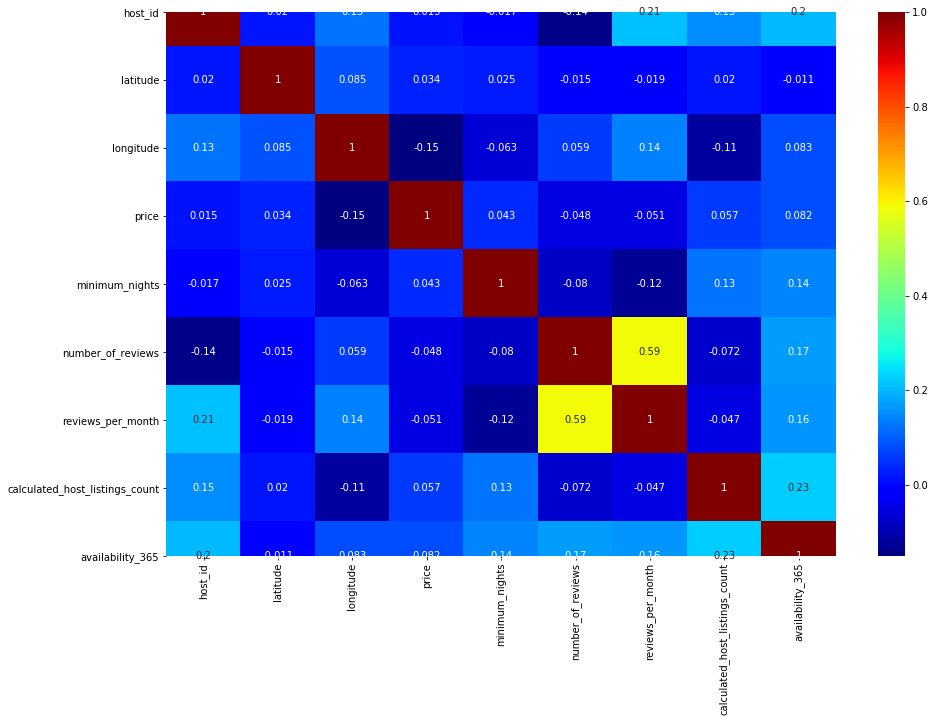

In [98]:
corr = airbnb.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='jet')

No clear correlation seen between price and other factors

### Q1: How different among neighbourhood groups? 

### Map of Neighbourhood group 

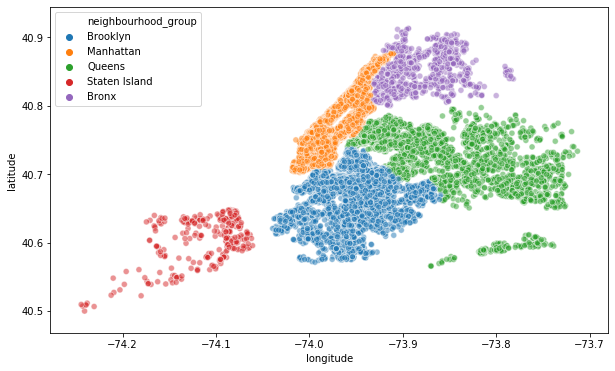

In [99]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5)

### Number of listings vs. neighbourhood group

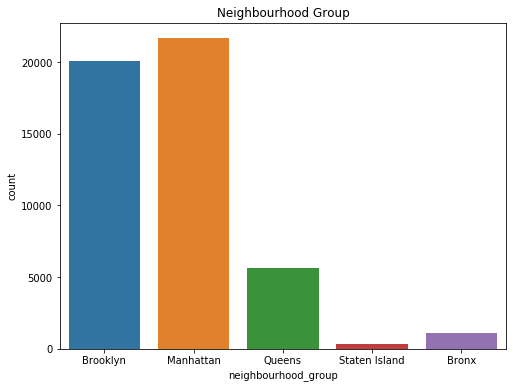

In [100]:
# counting number of listings in each neighbourhood
plt.figure(figsize=(8,6))
plt.title('Neighbourhood Group')
sns.countplot(airbnb['neighbourhood_group']) 

Manhattan and Brooklyn have the largest number of listings 

### Room types vs. neighbourhood group

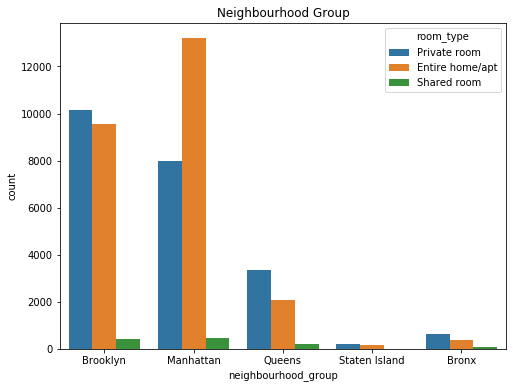

In [101]:
# counting room_type in each neighbourhood group

plt.figure(figsize=(8,6))
plt.title('Neighbourhood Group')
sns.countplot(airbnb['neighbourhood_group'], hue=airbnb['room_type'])

Brooklyn has more private rooms than Manhattan, while Manhattan has more entire homes/apts.

### Availability of Room vs. Neighbourhood group

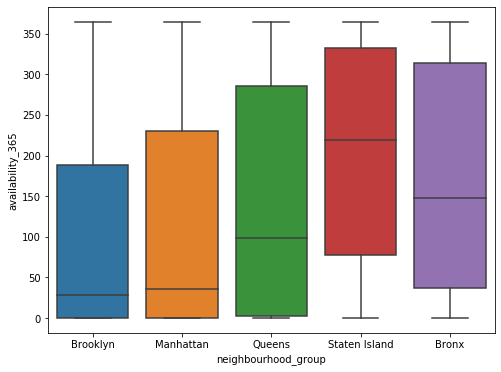

In [102]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb['neighbourhood_group'], y=airbnb['availability_365'])

The availability is lower at Brooklyn and Manhattan compared to others.

### Price vs. Neighbourhood group

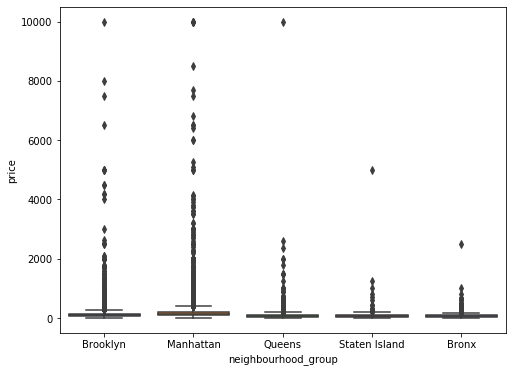

In [103]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb['neighbourhood_group'], y=airbnb['price'])

need to drop outliers to see the difference of price.

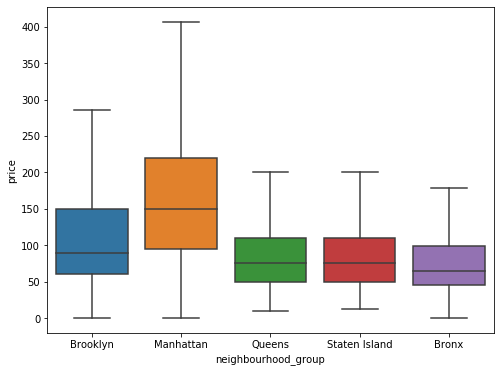

In [104]:
# drop outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x='neighbourhood_group', y='price', showfliers=False)

The median of price in Manhattan is ~$150, which is much higher than other neighbourhoods.

/Users/lizhen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


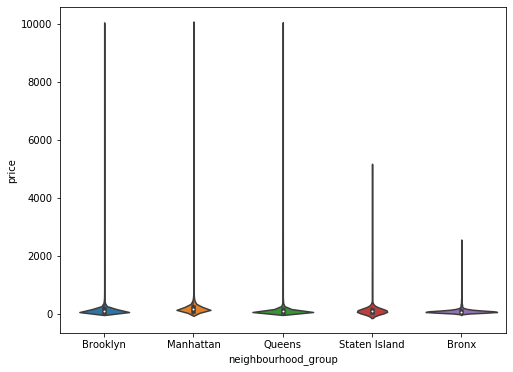

In [105]:
# plot violinplot to show the distribution of price.
plt.figure(figsize=(8,6))
sns.violinplot(data=airbnb, x='neighbourhood_group', y='price')

Could not clearly see the distribution of price due to outliers. need to drop outliers.

In [106]:
# drop outliers. Since the price for most of listings are below $500, 
# drop the listings that the price is higher than $500.
airbnb = airbnb[airbnb['price']<500]

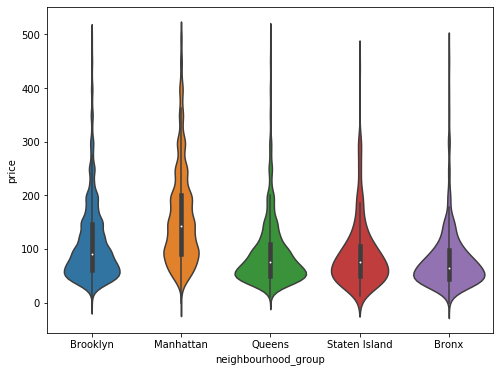

In [107]:
plt.figure(figsize=(8,6))
sns.violinplot(data=airbnb, x='neighbourhood_group', y='price')

The range of price is larger in manhattan than other locatons.

### Q2: Which factors affect the price?

### Room Type vs. Price

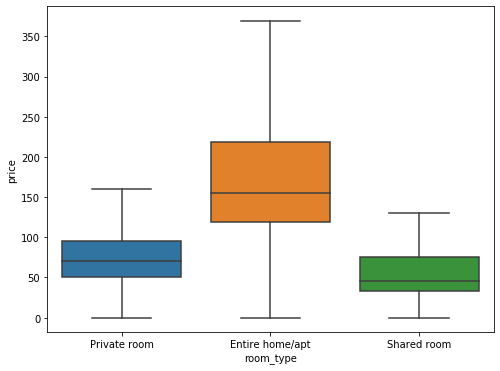

In [108]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb['room_type'], y=airbnb['price'], showfliers=False)

Entire home/apt is more expensive than private room and shared room. make sense. 

Private room does not much more expensive than shared room.

### Neighbourhood vs. Price

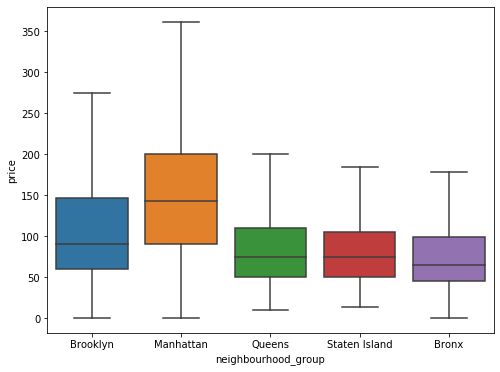

In [109]:
# drop outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x='neighbourhood_group', y='price', showfliers=False)

The price in manhattan is much more expensive than other locations.

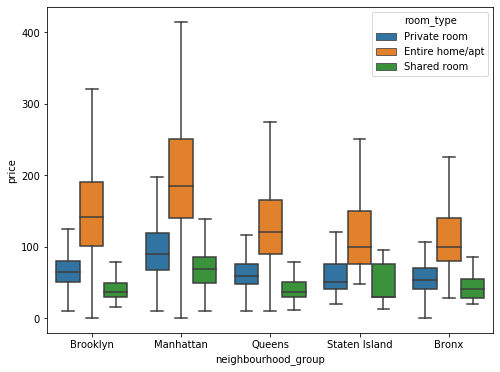

In [110]:
# by room type

plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb['neighbourhood_group'], y=airbnb['price'], hue=airbnb['room_type'], showfliers=False)

The price change of each room type among different neighbourhoods is similar.

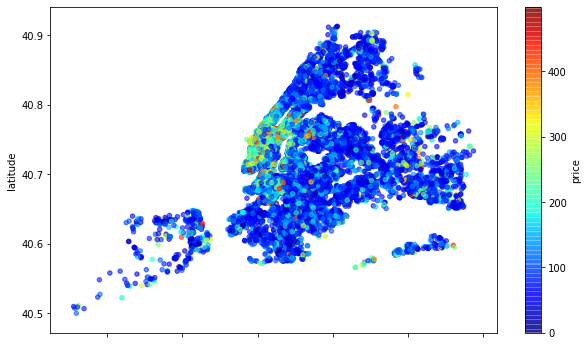

In [111]:
# price map
airbnb.plot.scatter(x='longitude', y='latitude', c='price', colormap='jet', colorbar=True, alpha=0.6, figsize=(10,6))

The price map of NYC. The most expensive area is Manhattan, indicated by the color. 

### Minimum nights vs. Price

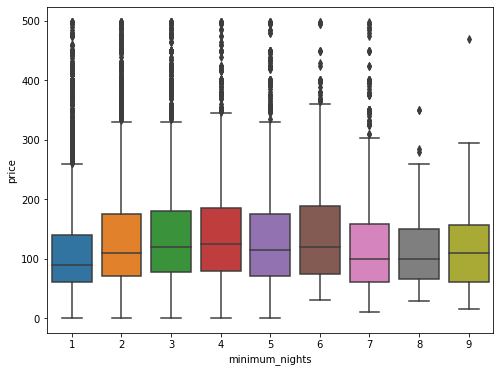

In [112]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb[airbnb['minimum_nights']<10].minimum_nights, y=airbnb['price'])

No a very clear trend. But looks like the price for minimum nights equaling to 1 is slightly lower. Interesting.

### Calculated_host_listings_count vs. Price

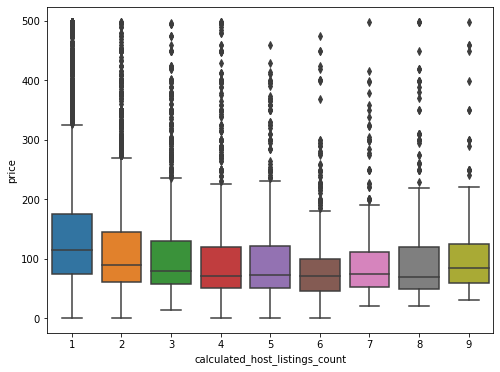

In [113]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb[airbnb['calculated_host_listings_count']<10].calculated_host_listings_count, y=airbnb['price'])

Looks like the price for calculated_host_listings_count equaling to 1 is slightly higher.

### Availability vs. Price

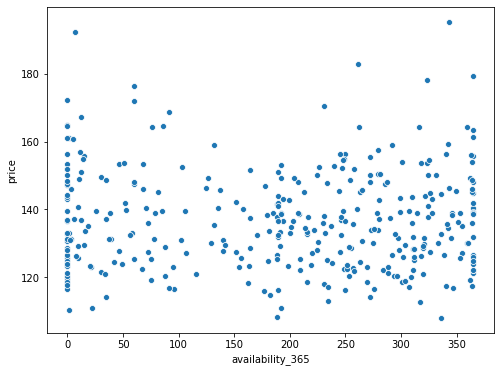

In [114]:
plt.figure(figsize=(8,6))
mean_price_by_availability = airbnb.groupby('availability_365')['price'].mean()
# price_by_availability
sns.scatterplot(data=airbnb, x=airbnb['availability_365'], y=mean_price_by_availability)

No clear trend betwen availability and price.

### WordCloud 

In [115]:
from wordcloud import WordCloud

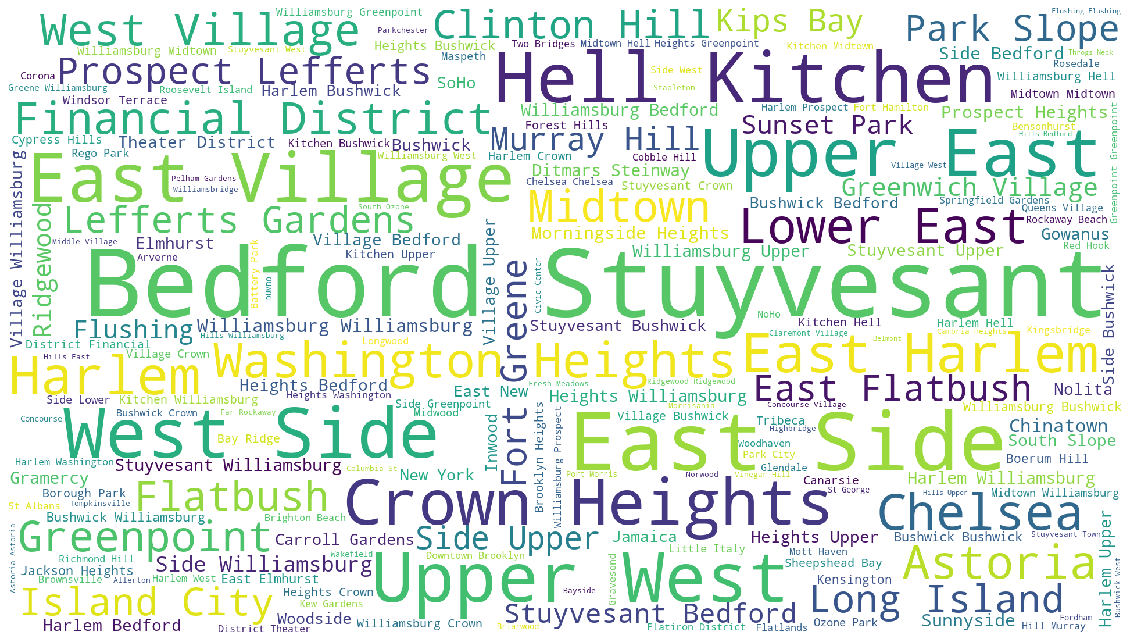

In [116]:
plt.figure(figsize=(20,16))
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(' '.join(airbnb['neighbourhood']))
plt.axis('off')
plt.imshow(wordcloud)

## Section 3: Data Preparation

In [117]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Processing categorical columns 

In [118]:
# drop unnecessary columns
airbnb.drop(['host_id','latitude','longitude','neighbourhood',
            'number_of_reviews','reviews_per_month'], axis=1, inplace=True)
airbnb.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [119]:
airbnb['neighbourhood_group'].nunique()

5

In [120]:
airbnb['room_type'].nunique()

3

#### Process categorical columns using two methods: LabelEncoder and get_dummies. 

In [121]:
# processing categorical columns using LabelEncoder.
import sklearn
from sklearn.preprocessing import LabelEncoder
airbnb_le = airbnb.copy()
le = LabelEncoder()
airbnb_le['neighbourhood_group'] = le.fit_transform(airbnb_le['neighbourhood_group'])
airbnb_le['room_type'] = le.fit_transform(airbnb_le['room_type'])
airbnb_le.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,149,1,6,365
1,2,0,225,1,2,355
2,2,1,150,3,1,365
3,1,0,89,1,1,194
4,2,0,80,10,1,0


In [122]:
# preprocessing categorical columns using get_dummies method.
airbnb_dummies = pd.get_dummies(airbnb)
airbnb_dummies.head()

,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,6,365,0,1,0,0,0,0,1,0
1,225,1,2,355,0,0,1,0,0,1,0,0
2,150,3,1,365,0,0,1,0,0,0,1,0
3,89,1,1,194,0,1,0,0,0,1,0,0
4,80,10,1,0,0,0,1,0,0,1,0,0


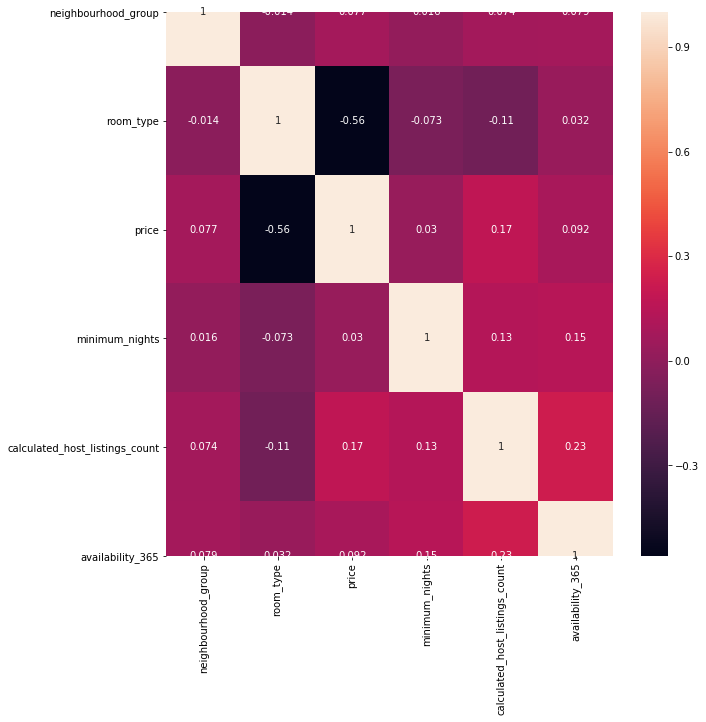

In [123]:
corr = airbnb_le.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

## Section 4: Modeling

### Q3: Can we predict the price?

Three models: Linear Regression, Decision Tree, and Random Forest are used to predict the price. 

Both airbnb_le (based on LabelEncoder method) and airbnb_dummies (based on get_dummies method) are used for each model. Their results are also compared.

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#### Linear Regression 

In [127]:
# Linear Regression model 
def lr_model(X, y, test_size=0.3, random_state=12):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    test_size - proportion of data as test data, float between 0 and 1, default 0.3
    random_state - random state for train_test_split, int, default 12
    
    OUTPUT
    r2_score_train - r2 score on the train data, float
    r2_score_test - r2 score on the test data, float
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    
    return r2_score_train, r2_score_test

In [130]:
# Linear Regression using airbnb_le (based on LabelEncoder method) 
X = airbnb_le.drop('price', axis=1)
y = airbnb_le['price']
r2_score_train, r2_score_test = lr_model(X, y)
print('Linear Regression:')
print('Score on training set: {:.3f}'.format(r2_score_train))
print('Score on testing set: {:.3f}'.format(r2_score_test))

Linear Regression:
Score on training set: 0.335
Score on testing set: 0.341


In [131]:
# Linear Regression using airbnb_le (based on LabelEncoder method) 
X = airbnb_dummies.drop('price', axis=1)
y = airbnb_dummies['price']
r2_score_train, r2_score_test = lr_model(X, y)
print('Linear Regression:')
print('Score on training set: {:.3f}'.format(r2_score_train))
print('Score on testing set: {:.3f}'.format(r2_score_test))

Linear Regression:
Score on training set: 0.405
Score on testing set: 0.404


The scores of linear regression models are not high. Maybe because the features are not closely correlated to the price. The model based on get_dummies method gives a bit better result.

#### Decision Tree Regression

In [141]:
# Decision Tree model 
def dt_model(X, y, test_size=0.3, random_state=12, max_depth=None, min_samples_leaf=1):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    test_size - float between 0 and 1, default 0.3, proportion of data as test data
    random_state - int, default 12, random state for train_test_split
    max_depth - int, default None, maximum depth of the tree
    min_samples_leaf - int or float, default 1, minimum number of samples required to be a leaf node
    
    OUTPUT
    r2_score_train - r2 score on the train data, float
    r2_score_test - r2 score on the test data, float
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    
    return r2_score_train, r2_score_test

In [142]:
# Decision tree regression using airbnb_le (based on LabelEncoder method) 
X = airbnb_le.drop('price', axis=1)
y = airbnb_le['price']
r2_score_train, r2_score_test = dt_model(X, y)
print('Decision Tree Regression:')
print('Score on training set: {:.3f}'.format(r2_score_train))
print('Score on testing set: {:.3f}'.format(r2_score_test))

Decision Tree Regression:
Score on training set: 0.709
Score on testing set: 0.194


Score on training set is much higher than that on testing set, indicating overfitting. 
Try to solve the overfitting by limiting max_depth and min_samples_leaf.

In [143]:
# Decision Tree, limiting max_depth and min_samples_leaf

X = airbnb_le.drop('price', axis=1)
y = airbnb_le['price']
r2_score_train, r2_score_test = dt_model(X, y, max_depth=5, min_samples_leaf=2)
print('Decision Tree Regression:')
print('Score on training set: {:.3f}'.format(r2_score_train))
print('Score on testing set: {:.3f}'.format(r2_score_test))


Decision Tree Regression:
Score on training set: 0.420
Score on testing set: 0.414


Limiting max depth of decision is helpful to increase the score.

In [144]:
# using airbnb_dummies (based on get_dummies method) 

X = airbnb_dummies.drop('price', axis=1)
y = airbnb_dummies['price']
r2_score_train, r2_score_test = dt_model(X, y, max_depth=5, min_samples_leaf=2)
print('Decision Tree Regression:')
print('Score on training set: {:.3f}'.format(r2_score_train))
print('Score on testing set: {:.3f}'.format(r2_score_test))


Decision Tree Regression:
Score on training set: 0.431
Score on testing set: 0.424


The socres of two models are very close.

#### Random Forest 

In [146]:
# Random Forest model 
def rf_model(X, y, test_size=0.3, random_state=12, max_depth=None):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    test_size - float between 0 and 1, default 0.3, proportion of data as test data
    random_state - int, default 12, random state for train_test_split
    max_depth - int, default None, maximum depth of the tree
    
    OUTPUT
    r2_score_train - r2 score on the train data, float
    r2_score_test - r2 score on the test data, float
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    rf = RandomForestRegressor(max_depth=max_depth)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    
    return r2_score_train, r2_score_test

In [147]:
# Random Forest using airbnb_le (based on LabelEncoder method) 

X = airbnb_le.drop('price', axis=1)
y = airbnb_le['price']
r2_score_train, r2_score_test = rf_model(X, y)
print('Random Forest Regression:')
print('Score on training set: {:.3f}'.format(r2_score_train))
print('Score on testing set: {:.3f}'.format(r2_score_test))

/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression:
Score on training set: 0.664
Score on testing set: 0.348


Score on training set is much higher than that on testing set, indicating overfitting.

In [148]:
# Random Forest, try to solve the overfitting

X = airbnb_le.drop('price', axis=1)
y = airbnb_le['price']
r2_score_train, r2_score_test = rf_model(X, y, max_depth=10)
print('Random Forest Regression:')
print('Score on training set: {:.3f}'.format(r2_score_train))
print('Score on testing set: {:.3f}'.format(r2_score_test))

/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression:
Score on training set: 0.495
Score on testing set: 0.444


In [149]:
# using airbnb_dummies (based on get_dummies method) 

X = airbnb_dummies.drop('price', axis=1)
y = airbnb_dummies['price']
r2_score_train, r2_score_test = rf_model(X, y, max_depth=10)
print('Random Forest Regression:')
print('Score on training set: {:.3f}'.format(r2_score_train))
print('Score on testing set: {:.3f}'.format(r2_score_test))

/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression:
Score on training set: 0.502
Score on testing set: 0.445


Random Forest is better than decision tree and linear regression. But the score is still not high. More features are needed. The socres of two models built using LabelEncoder and get_dummies methods are very close. 

## Conclusions 

#### 1. What is the difference among the neighbourhood of NYC?
    - Most of listings are in Manhattan and Brooklyn. 
    - Brooklyn has more private rooms than Manhattan, while Manhattan has more entire homes/apts.
    - The availability is lower in Brooklyn and Manhattan compared to others.
    - The price in Manhattan is much higher than other neighbourhoods. The median price in Manhattan is ~$150, 
    while other locations are less than $100.
    - The range of price is larger in manhattan than other locatons.
    
#### 2. Which factors affect the price?
    - Entire home/apt is more expensive than private room and shared room. 
    But, private room does not much more expensive than shared room.
    - Price in manhattan is much more expensive than other locations.
    - Intersting findings: the price for listings that minimum nights equals to 1 is slightly lower than others; 
    the price for listings that calculated_host_listings_count equals to 1 is slightly higher.

#### 3. Can we predict the price?
    - Three models are used to predict the price. Random forest gives the best result with an R2 score of 0.445, 
    compared to decision tree and linear regression. 
    - The score is still not high. It might because the features used are not quite correlated with the price. 
    More features are needed for a better result.

